# Registering arbitrary trace events

`trappy` knows about some trace events. You can add your own in the notebook without having to change any code in `trappy`.  After the trace is registered, the next time you parse a trace file that information will be part of the trace object as a pandas `DataFrame` and can be analyzed like the other `DataFrame`s in the `FTrace` class.

The trace event must follow the following format:

    title: key0=value0 key1=value1 key2=value2 ...

The title should be something that's unique in the trace.  For example, you can generate trace with the following `trace_printk()`:

    trace_printk("thermal_gpu_power_get: frequency=%u load=%d\n", freq, load);

which will appear in the `trace.txt` as:

    kworker/6:1-457   [006]   144.439566: bprint:               0xc042f8a0f: thermal_gpu_power_get: frequency=177 load=0

You can add this event to the trace instance using `register_dynamic_ftrace()`

First import trappy

In [13]:
import sys
sys.path.append("..")
%matplotlib inline
import trappy

Register it.  The first argument is the name under which you will find it in the trace instance.  It will be changed to lower_case_with_underscores_to_separate_words.  The second argument is some unique text in the trace, usually the title:

In [14]:
trappy.register_dynamic_ftrace("eas", "energy_aware_wake_cpu")

trappy.dynamic.eas

In [15]:
!grep energy_aware_wake_cpu ../../tutorial/example_results/trace.txt

           <...>-20278 [001]   713.575367: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=3 task_util=35 new_util=38 cap_org=591 cap_cur=212 nr=0
           <...>-20278 [001]   713.575375: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=34 task_util=35 new_util=69 cap_org=591 cap_cur=212 nr=1
          <idle>-0     [001]   713.576457: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=3 task_util=1 new_util=4 cap_org=591 cap_cur=212 nr=1
              sh-20277 [000]   713.576523: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=7 task_util=130 new_util=137 cap_org=591 cap_cur=212 nr=1
            sudo-20276 [000]   713.577992: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=7 task_util=2 new_util=9 cap_org=591 cap_cur=212 nr=1
            sudo-20276 [000]   713.580386: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=20 task_util=2 new_util=22 cap_org=591 cap_cur=212 nr=3
          <idle>-0     [001]   713.580495: bpri

    kworker/u8:0-6     [000]   717.480413: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=127 task_util=6 new_util=133 cap_org=591 cap_cur=212 nr=3
    kworker/u8:0-6     [000]   717.484350: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=132 task_util=7 new_util=139 cap_org=591 cap_cur=212 nr=2
              sh-20340 [000]   717.488392: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=140 task_util=6 new_util=146 cap_org=591 cap_cur=212 nr=2
     migration/3-23    [003]   717.490604: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=143 task_util=82 new_util=225 cap_org=591 cap_cur=212 nr=1
     migration/3-23    [003]   717.490610: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=13 task_util=82 new_util=95 cap_org=591 cap_cur=212 nr=0
              sh-20340 [000]   717.492394: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=145 task_util=7 new_util=152 cap_org=591 cap_cur=212 nr=3
              sh-20340 [000]   717

          <idle>-0     [000]   720.776563: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=30 task_util=4 new_util=34 cap_org=591 cap_cur=212 nr=0
          <idle>-0     [000]   720.776571: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=5 task_util=4 new_util=9 cap_org=591 cap_cur=212 nr=0
          <idle>-0     [000]   720.784616: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=27 task_util=4 new_util=31 cap_org=591 cap_cur=212 nr=1
          <idle>-0     [003]   720.788716: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=23 task_util=235 new_util=258 cap_org=591 cap_cur=212 nr=0
          <idle>-0     [003]   720.788719: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=5 task_util=235 new_util=240 cap_org=591 cap_cur=212 nr=0
          <idle>-0     [000]   720.792586: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=23 task_util=4 new_util=27 cap_org=591 cap_cur=212 nr=0
          <idle>-0     [000]   720.792595: 

          chrome-20552 [000]   723.922185: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=399 task_util=58 new_util=457 cap_org=591 cap_cur=497 nr=2
          chrome-20551 [001]   723.922330: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=385 task_util=6 new_util=391 cap_org=591 cap_cur=497 nr=1
          chrome-20551 [001]   723.922510: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=385 task_util=96 new_util=481 cap_org=591 cap_cur=497 nr=1
          chrome-20552 [000]   723.922694: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=385 task_util=63 new_util=448 cap_org=591 cap_cur=497 nr=2
          chrome-20551 [001]   723.922864: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=385 task_util=97 new_util=482 cap_org=591 cap_cur=497 nr=1
          chrome-20551 [001]   723.922993: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=385 task_util=97 new_util=482 cap_org=591 cap_cur=497 nr=1
          chrome-20552 [000] 

          chrome-20552 [000]   724.337642: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=157 task_util=41 new_util=198 cap_org=591 cap_cur=295 nr=1
          chrome-20552 [000]   724.337812: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=157 task_util=42 new_util=199 cap_org=591 cap_cur=295 nr=1
          chrome-20552 [000]   724.337973: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=157 task_util=42 new_util=199 cap_org=591 cap_cur=295 nr=1
 session_manager-20527 [003]   724.337994: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=157 task_util=70 new_util=227 cap_org=591 cap_cur=295 nr=1
          chrome-20552 [000]   724.338134: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=157 task_util=42 new_util=199 cap_org=591 cap_cur=295 nr=2
          chrome-20552 [000]   724.338294: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=157 task_util=42 new_util=199 cap_org=591 cap_cur=295 nr=2
          chrome-20552 [000]

 BrowserBlocking-20601 [000]   724.690936: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=402 task_util=389 new_util=791 cap_org=591 cap_cur=591 nr=0
          chrome-20548 [001]   724.690991: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=409 task_util=5 new_util=414 cap_org=591 cap_cur=591 nr=5
          chrome-20554 [000]   724.691046: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=409 task_util=1 new_util=410 cap_org=591 cap_cur=591 nr=5
 BrowserBlocking-20601 [000]   724.691105: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=409 task_util=9 new_util=418 cap_org=591 cap_cur=591 nr=5
 BrowserBlocking-20601 [000]   724.691299: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=409 task_util=367 new_util=776 cap_org=591 cap_cur=591 nr=6
 BrowserBlocking-20601 [000]   724.691302: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=404 task_util=367 new_util=771 cap_org=591 cap_cur=591 nr=0
          chrome-20554 [000]

          chrome-20552 [000]   725.060979: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=315 task_util=139 new_util=454 cap_org=591 cap_cur=421 nr=1
          chrome-20552 [000]   725.060983: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=299 task_util=139 new_util=438 cap_org=591 cap_cur=421 nr=1
          chrome-20616 [001]   725.061002: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=315 task_util=395 new_util=710 cap_org=591 cap_cur=421 nr=1
          chrome-20616 [001]   725.061006: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=299 task_util=395 new_util=694 cap_org=591 cap_cur=421 nr=1
          chrome-20616 [001]   725.061181: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=315 task_util=388 new_util=703 cap_org=591 cap_cur=421 nr=1
          chrome-20616 [001]   725.061184: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=295 task_util=388 new_util=683 cap_org=591 cap_cur=421 nr=2
          chrome-20615

          chrome-20615 [002]   725.253674: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=379 task_util=87 new_util=466 cap_org=591 cap_cur=591 nr=1
          chrome-20552 [000]   725.253802: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=379 task_util=150 new_util=529 cap_org=591 cap_cur=591 nr=1
          chrome-20623 [001]   725.254103: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=568 task_util=567 new_util=1135 cap_org=1024 cap_cur=685 nr=0
          chrome-20623 [001]   725.254106: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=632 task_util=567 new_util=1199 cap_org=1024 cap_cur=685 nr=0
          chrome-20615 [002]   725.254348: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=379 task_util=114 new_util=493 cap_org=591 cap_cur=591 nr=1
          chrome-20552 [000]   725.254376: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=379 task_util=150 new_util=529 cap_org=591 cap_cur=591 nr=1
          chrome-20

          chrome-20552 [000]   725.972611: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=101 task_util=0 new_util=101 cap_org=591 cap_cur=212 nr=2
          chrome-20552 [000]   725.972755: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=103 task_util=2 new_util=105 cap_org=591 cap_cur=212 nr=2
          chrome-20552 [000]   725.972886: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=103 task_util=2 new_util=105 cap_org=591 cap_cur=212 nr=2
          chrome-20552 [000]   725.973035: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=103 task_util=2 new_util=105 cap_org=591 cap_cur=212 nr=2
 session_manager-20527 [000]   725.973311: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=103 task_util=2 new_util=105 cap_org=591 cap_cur=212 nr=1
 session_manager-20527 [000]   725.973627: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=103 task_util=29 new_util=132 cap_org=591 cap_cur=212 nr=1
 session_manager-20527 [000]   72

          chrome-20615 [000]   727.173557: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=253 task_util=18 new_util=271 cap_org=591 cap_cur=295 nr=1
          chrome-20615 [000]   727.173720: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=255 task_util=16 new_util=271 cap_org=591 cap_cur=295 nr=1
          chrome-20615 [000]   727.173832: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=255 task_util=16 new_util=271 cap_org=591 cap_cur=295 nr=1
          chrome-20615 [000]   727.173946: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=251 task_util=16 new_util=267 cap_org=591 cap_cur=295 nr=1
          chrome-20615 [000]   727.174385: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=251 task_util=27 new_util=278 cap_org=591 cap_cur=295 nr=1
          chrome-20616 [001]   727.174722: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=251 task_util=36 new_util=287 cap_org=591 cap_cur=295 nr=1
          chrome-20615 [000]

            sshd-20294 [001]   727.361083: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=255 task_util=22 new_util=277 cap_org=591 cap_cur=295 nr=1
 session_manager-20527 [001]   727.361481: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=283 task_util=20 new_util=303 cap_org=591 cap_cur=295 nr=2
 session_manager-20527 [001]   727.361486: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=255 task_util=20 new_util=275 cap_org=591 cap_cur=295 nr=3
 Chrome_ProcessL-20560 [000]   727.361591: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=283 task_util=17 new_util=300 cap_org=591 cap_cur=295 nr=1
 Chrome_ProcessL-20560 [000]   727.361596: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=276 task_util=17 new_util=293 cap_org=591 cap_cur=295 nr=4
 Chrome_ProcessL-20560 [000]   727.361722: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=283 task_util=25 new_util=308 cap_org=591 cap_cur=295 nr=1
 Chrome_ProcessL-20560 [000]

  ksdioirqd/mmc2-1364  [000]   727.556897: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=182 task_util=3 new_util=185 cap_org=591 cap_cur=212 nr=2
  ksdioirqd/mmc2-1364  [000]   727.557050: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=182 task_util=76 new_util=258 cap_org=591 cap_cur=212 nr=2
  ksdioirqd/mmc2-1364  [000]   727.557057: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=145 task_util=76 new_util=221 cap_org=591 cap_cur=212 nr=1
         mmcqd/0-122   [001]   727.557252: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=182 task_util=4 new_util=186 cap_org=591 cap_cur=212 nr=2
 jbd2/mmcblk0p1--209   [000]   727.557554: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=178 task_util=3 new_util=181 cap_org=591 cap_cur=212 nr=2
          <idle>-0     [000]   727.557831: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=176 task_util=3 new_util=179 cap_org=591 cap_cur=212 nr=0
          <idle>-0     [000]   7

          <idle>-0     [000]   727.748035: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=50 task_util=23 new_util=73 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [000]   727.748274: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=89 task_util=40 new_util=129 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [000]   727.748276: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=53 task_util=40 new_util=93 cap_org=591 cap_cur=591 nr=1
          <idle>-0     [000]   727.748337: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=77 task_util=4 new_util=81 cap_org=591 cap_cur=591 nr=1
          <idle>-0     [000]   727.748776: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=77 task_util=29 new_util=106 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [000]   727.748779: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=53 task_util=29 new_util=82 cap_org=591 cap_cur=591 nr=1
          <idle>-0     [000]   727.7489

 session_manager-20527 [000]   727.973373: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=99 task_util=11 new_util=110 cap_org=591 cap_cur=212 nr=1
 session_manager-20527 [000]   727.973572: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=99 task_util=11 new_util=110 cap_org=591 cap_cur=212 nr=1
            sshd-20647 [001]   727.973594: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=99 task_util=26 new_util=125 cap_org=591 cap_cur=212 nr=2
            sshd-20647 [001]   727.976351: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=101 task_util=4 new_util=105 cap_org=591 cap_cur=212 nr=0
            sshd-20647 [001]   727.976359: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=137 task_util=4 new_util=141 cap_org=591 cap_cur=212 nr=1
            sshd-20647 [001]   727.977994: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=97 task_util=17 new_util=114 cap_org=591 cap_cur=212 nr=0
            sshd-20647 [001]   727

 session_manager-20527 [000]   728.174294: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=391 task_util=6 new_util=397 cap_org=591 cap_cur=421 nr=3
         mmcqd/0-122   [000]   728.174424: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=391 task_util=27 new_util=418 cap_org=591 cap_cur=421 nr=2
         mmcqd/0-122   [000]   728.174520: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=391 task_util=27 new_util=418 cap_org=591 cap_cur=421 nr=2
         mmcqd/0-122   [000]   728.174613: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=391 task_util=27 new_util=418 cap_org=591 cap_cur=421 nr=2
         mmcqd/0-122   [000]   728.174641: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=391 task_util=6 new_util=397 cap_org=591 cap_cur=421 nr=3
         mmcqd/0-122   [000]   728.174781: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=391 task_util=27 new_util=418 cap_org=591 cap_cur=421 nr=2
 session_manager-20527 [000]  

        spi32766-83    [000]   728.314819: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=395 task_util=342 new_util=737 cap_org=591 cap_cur=591 nr=2
 permission_brok-650   [002]   728.315167: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=368 task_util=9 new_util=377 cap_org=591 cap_cur=591 nr=0
 permission_brok-650   [002]   728.315169: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=395 task_util=9 new_util=404 cap_org=591 cap_cur=591 nr=2
          <idle>-0     [000]   728.315370: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=368 task_util=9 new_util=377 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [000]   728.315372: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=395 task_util=9 new_util=404 cap_org=591 cap_cur=591 nr=2
        spi32766-83    [000]   728.315440: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=368 task_util=343 new_util=711 cap_org=591 cap_cur=591 nr=1
        spi32766-83    [000]  

          chrome-20552 [002]   736.728865: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=804 task_util=28 new_util=832 cap_org=1024 cap_cur=287 nr=1
          chrome-20552 [002]   736.728872: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=355 task_util=28 new_util=526 cap_org=1024 cap_cur=287 nr=0
          chrome-20706 [003]   736.729310: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=804 task_util=64 new_util=868 cap_org=1024 cap_cur=287 nr=0
          chrome-20706 [003]   736.729317: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=355 task_util=64 new_util=544 cap_org=1024 cap_cur=287 nr=1
          <idle>-0     [000]   736.730794: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=310 task_util=19 new_util=329 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [000]   736.730797: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=386 task_util=19 new_util=405 cap_org=591 cap_cur=591 nr=1
          <idle>-0     [

          chrome-20705 [003]   736.751365: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=262 task_util=56 new_util=540 cap_org=1024 cap_cur=287 nr=1
          <idle>-0     [000]   736.751512: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=322 task_util=79 new_util=401 cap_org=591 cap_cur=464 nr=0
          <idle>-0     [000]   736.751515: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=396 task_util=79 new_util=475 cap_org=591 cap_cur=464 nr=0
         mmcqd/0-122   [000]   736.751641: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=322 task_util=10 new_util=332 cap_org=591 cap_cur=464 nr=1
          chrome-20705 [003]   736.751818: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=495 task_util=17 new_util=520 cap_org=1024 cap_cur=287 nr=3
          chrome-20705 [003]   736.751824: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=262 task_util=17 new_util=520 cap_org=1024 cap_cur=287 nr=1
          chrome-20705 [0

 session_manager-20527 [000]   736.822236: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=11 new_util=346 cap_org=591 cap_cur=212 nr=3
 session_manager-20527 [000]   736.822243: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=295 task_util=11 new_util=306 cap_org=591 cap_cur=212 nr=0
    kworker/u8:3-110   [001]   736.822421: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=1 new_util=336 cap_org=591 cap_cur=212 nr=3
    kworker/u8:3-110   [001]   736.822428: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=289 task_util=1 new_util=290 cap_org=591 cap_cur=212 nr=1
 session_manager-20527 [000]   736.822542: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=330 task_util=29 new_util=359 cap_org=591 cap_cur=212 nr=4
 session_manager-20527 [000]   736.822549: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=289 task_util=29 new_util=318 cap_org=591 cap_cur=212 nr=1
    kworker/u8:3-110   [001]  

 session_manager-20527 [000]   736.886122: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=215 task_util=67 new_util=282 cap_org=591 cap_cur=421 nr=0
 session_manager-20527 [000]   736.886453: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=364 task_util=16 new_util=380 cap_org=591 cap_cur=421 nr=2
          chrome-20552 [000]   736.886637: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=372 task_util=28 new_util=400 cap_org=591 cap_cur=421 nr=2
          chrome-20596 [000]   736.886889: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=366 task_util=21 new_util=387 cap_org=591 cap_cur=421 nr=2
          chrome-20552 [000]   736.887050: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=366 task_util=66 new_util=432 cap_org=591 cap_cur=421 nr=2
          chrome-20552 [000]   736.887053: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=214 task_util=66 new_util=280 cap_org=591 cap_cur=421 nr=0
 session_manager-20527 [000]

    kworker/u8:0-6     [000]   736.939595: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=395 task_util=29 new_util=424 cap_org=591 cap_cur=497 nr=3
 Chrome_ProcessL-20560 [000]   736.939791: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=395 task_util=27 new_util=422 cap_org=591 cap_cur=497 nr=1
 Chrome_ProcessL-20560 [000]   736.939886: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=395 task_util=27 new_util=422 cap_org=591 cap_cur=497 nr=1
 Chrome_ProcessL-20560 [000]   736.939957: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=395 task_util=27 new_util=422 cap_org=591 cap_cur=497 nr=1
          chrome-20737 [000]   736.940207: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=395 task_util=86 new_util=481 cap_org=591 cap_cur=497 nr=2
          chrome-20737 [000]   736.940325: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=395 task_util=86 new_util=481 cap_org=591 cap_cur=497 nr=2
         mmcqd/0-122   [001]

          chrome-20737 [001]   737.003112: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=445 task_util=265 new_util=710 cap_org=591 cap_cur=464 nr=0
          chrome-20737 [001]   737.003115: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=218 task_util=265 new_util=483 cap_org=591 cap_cur=464 nr=1
 Chrome_ProcessL-20560 [000]   737.003291: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=445 task_util=63 new_util=508 cap_org=591 cap_cur=464 nr=1
 Chrome_ProcessL-20560 [000]   737.003294: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=217 task_util=63 new_util=280 cap_org=591 cap_cur=464 nr=0
          chrome-20737 [001]   737.003513: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=447 task_util=263 new_util=710 cap_org=591 cap_cur=464 nr=0
          chrome-20737 [001]   737.003516: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=217 task_util=263 new_util=480 cap_org=591 cap_cur=464 nr=1
          chrome-20737 [

 Chrome_ChildIOT-20597 [000]   737.061837: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=453 task_util=23 new_util=476 cap_org=591 cap_cur=591 nr=3
 Chrome_ChildIOT-20597 [000]   737.061877: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=453 task_util=41 new_util=494 cap_org=591 cap_cur=591 nr=4
          <idle>-0     [001]   737.061906: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=453 task_util=59 new_util=512 cap_org=591 cap_cur=591 nr=4
    kworker/u8:0-6     [000]   737.062009: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=453 task_util=13 new_util=466 cap_org=591 cap_cur=591 nr=2
    kworker/u8:0-6     [000]   737.062046: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=453 task_util=83 new_util=536 cap_org=591 cap_cur=591 nr=3
 Chrome_ProcessL-20560 [000]   737.062233: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=455 task_util=43 new_util=498 cap_org=591 cap_cur=591 nr=1
 Chrome_ProcessL-20560 [000]

          chrome-20706 [002]   737.404890: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=506 task_util=81 new_util=587 cap_org=1024 cap_cur=1024 nr=3
          chrome-20706 [002]   737.404939: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=506 task_util=81 new_util=587 cap_org=1024 cap_cur=1024 nr=3
          chrome-20706 [002]   737.404985: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=506 task_util=81 new_util=587 cap_org=1024 cap_cur=1024 nr=3
          chrome-20707 [002]   737.405291: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=506 task_util=133 new_util=639 cap_org=1024 cap_cur=1024 nr=4
          chrome-20706 [002]   737.405493: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=326 task_util=32 new_util=358 cap_org=591 cap_cur=212 nr=0
          chrome-20706 [002]   737.405495: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=316 task_util=32 new_util=348 cap_org=591 cap_cur=212 nr=1
          chrome-20

 Chrome_ProcessL-20560 [000]   737.471672: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=402 task_util=27 new_util=429 cap_org=591 cap_cur=421 nr=1
 Chrome_ProcessL-20560 [000]   737.471675: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=106 task_util=27 new_util=133 cap_org=591 cap_cur=421 nr=0
          chrome-20596 [001]   737.471919: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=402 task_util=39 new_util=441 cap_org=591 cap_cur=421 nr=1
          chrome-20596 [001]   737.471923: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=106 task_util=39 new_util=145 cap_org=591 cap_cur=421 nr=1
          chrome-20552 [000]   737.472151: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=404 task_util=59 new_util=463 cap_org=591 cap_cur=421 nr=2
          chrome-20552 [000]   737.472155: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=109 task_util=59 new_util=168 cap_org=591 cap_cur=421 nr=0
 session_manager-20527 [001]

          chrome-20705 [003]   737.528408: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=498 task_util=97 new_util=595 cap_org=1024 cap_cur=1024 nr=0
          chrome-20705 [003]   737.528410: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=576 task_util=97 new_util=673 cap_org=1024 cap_cur=1024 nr=1
          chrome-20707 [002]   737.528690: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=443 task_util=608 new_util=1051 cap_org=1024 cap_cur=1024 nr=1
          chrome-20707 [002]   737.528692: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=568 task_util=608 new_util=1176 cap_org=1024 cap_cur=1024 nr=0
          chrome-20707 [002]   737.529125: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=443 task_util=207 new_util=650 cap_org=1024 cap_cur=1024 nr=1
          chrome-20709 [002]   737.529226: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=448 task_util=217 new_util=665 cap_org=1024 cap_cur=1024 nr=1
          

    kworker/u8:3-110   [001]   737.586701: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=327 task_util=12 new_util=339 cap_org=591 cap_cur=421 nr=2
    kworker/u8:3-110   [001]   737.586744: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=240 task_util=64 new_util=304 cap_org=591 cap_cur=421 nr=0
    kworker/u8:3-110   [001]   737.586748: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=327 task_util=64 new_util=391 cap_org=591 cap_cur=421 nr=3
 Chrome_ProcessL-20560 [001]   737.586999: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=240 task_util=66 new_util=306 cap_org=591 cap_cur=421 nr=0
 Chrome_ProcessL-20560 [001]   737.587003: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=327 task_util=66 new_util=393 cap_org=591 cap_cur=421 nr=1
          chrome-20737 [000]   737.587304: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=240 task_util=286 new_util=526 cap_org=591 cap_cur=421 nr=1
          chrome-20737 [000

          chrome-20552 [000]   737.743569: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=267 task_util=92 new_util=359 cap_org=591 cap_cur=591 nr=1
          <idle>-0     [002]   737.744244: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=267 task_util=11 new_util=278 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [002]   737.744246: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=237 task_util=11 new_util=248 cap_org=591 cap_cur=591 nr=1
          <idle>-0     [000]   737.744411: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=635 task_util=114 new_util=749 cap_org=1024 cap_cur=913 nr=0
          <idle>-0     [000]   737.744414: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=770 task_util=114 new_util=884 cap_org=1024 cap_cur=913 nr=0
          <idle>-0     [002]   737.744811: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=264 task_util=86 new_util=350 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [

 Chrome_ProcessL-20560 [000]   737.840591: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=4 new_util=339 cap_org=591 cap_cur=591 nr=1
 Chrome_ProcessL-20560 [000]   737.840620: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=0 new_util=335 cap_org=591 cap_cur=591 nr=2
 Chrome_ProcessL-20560 [000]   737.840693: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=2 new_util=337 cap_org=591 cap_cur=591 nr=2
 Chrome_ProcessL-20560 [000]   737.841339: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=7 new_util=342 cap_org=591 cap_cur=591 nr=1
    kworker/u8:3-110   [001]   737.841501: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=16 new_util=351 cap_org=591 cap_cur=591 nr=1
    kworker/u8:3-110   [001]   737.841564: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=335 task_util=36 new_util=371 cap_org=591 cap_cur=591 nr=1
          chrome-20737 [001]   7

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



628384: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=267 task_util=5 new_util=272 cap_org=591 cap_cur=591 nr=3
          chrome-20552 [000]   744.630911: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=284 task_util=174 new_util=458 cap_org=591 cap_cur=591 nr=2
 session_manager-20527 [003]   744.631423: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=282 task_util=12 new_util=294 cap_org=591 cap_cur=591 nr=1
          chrome-20551 [000]   744.631973: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=188 task_util=122 new_util=310 cap_org=591 cap_cur=591 nr=2
          chrome-20792 [000]   744.632283: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=181 task_util=2 new_util=183 cap_org=591 cap_cur=591 nr=1
          chrome-20792 [000]   744.632312: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=181 task_util=5 new_util=186 cap_org=591 cap_cur=591 nr=2
 session_manager-20527 [003]   744.632417: bprint:              

 session_manager-20527 [001]   744.711003: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=324 task_util=7 new_util=331 cap_org=591 cap_cur=464 nr=1
           evdev-20609 [003]   744.711563: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=324 task_util=38 new_util=362 cap_org=591 cap_cur=464 nr=1
          chrome-20792 [000]   744.712324: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=331 task_util=5 new_util=336 cap_org=591 cap_cur=464 nr=1
          chrome-20792 [000]   744.712367: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=331 task_util=3 new_util=334 cap_org=591 cap_cur=464 nr=2
          chrome-20540 [001]   744.713901: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=331 task_util=202 new_util=533 cap_org=591 cap_cur=464 nr=1
          chrome-20540 [001]   744.713904: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=368 task_util=202 new_util=570 cap_org=591 cap_cur=464 nr=3
          chrome-20543 [001] 

         rs:main-380   [000]   744.838422: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=327 task_util=0 new_util=327 cap_org=591 cap_cur=421 nr=2
            init-20456 [001]   744.838748: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=327 task_util=19 new_util=346 cap_org=591 cap_cur=421 nr=3
            init-20456 [001]   744.838938: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=327 task_util=1 new_util=328 cap_org=591 cap_cur=421 nr=3
     dbus-daemon-398   [001]   744.839600: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=331 task_util=5 new_util=336 cap_org=591 cap_cur=421 nr=1
     dbus-daemon-398   [001]   744.839682: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=331 task_util=0 new_util=331 cap_org=591 cap_cur=421 nr=2
     dbus-daemon-398   [001]   744.839812: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=331 task_util=7 new_util=338 cap_org=591 cap_cur=421 nr=2
            init-20456 [001]   74

              sh-20808 [001]   745.304321: bprint:               energy_aware_wake_cpu: cpu=2 cpu_util=12 task_util=508 new_util=520 cap_org=1024 cap_cur=287 nr=1
              sh-20808 [001]   745.304324: bprint:               energy_aware_wake_cpu: cpu=3 cpu_util=375 task_util=508 new_util=883 cap_org=1024 cap_cur=287 nr=0
    kworker/u8:3-110   [003]   745.304695: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=2 task_util=0 new_util=2 cap_org=591 cap_cur=591 nr=0
    kworker/u8:3-110   [003]   745.304701: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=301 task_util=0 new_util=301 cap_org=591 cap_cur=591 nr=1
    kworker/u8:3-110   [003]   745.304744: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=2 task_util=12 new_util=14 cap_org=591 cap_cur=591 nr=0
    kworker/u8:3-110   [003]   745.304749: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=301 task_util=12 new_util=313 cap_org=591 cap_cur=591 nr=2
    kworker/u8:3-110   [003]   745

         mmcqd/0-122   [000]   745.636301: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=231 task_util=8 new_util=239 cap_org=591 cap_cur=591 nr=1
          <idle>-0     [000]   745.637704: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=237 task_util=30 new_util=267 cap_org=591 cap_cur=591 nr=0
          <idle>-0     [000]   745.637707: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=68 task_util=30 new_util=98 cap_org=591 cap_cur=591 nr=0
         mmcqd/0-122   [000]   745.637808: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=239 task_util=6 new_util=245 cap_org=591 cap_cur=591 nr=1
 jbd2/mmcblk0p1--209   [000]   745.637894: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=239 task_util=175 new_util=414 cap_org=591 cap_cur=591 nr=1
     cryptohomed-657   [000]   745.638334: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=239 task_util=7 new_util=246 cap_org=591 cap_cur=591 nr=1
 jbd2/mmcblk0p1--209   [000]   7

         rs:main-380   [000]   745.781491: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=204 task_util=0 new_util=204 cap_org=591 cap_cur=421 nr=4
            init-1     [001]   745.782092: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=208 task_util=45 new_util=253 cap_org=591 cap_cur=421 nr=3
            init-1     [001]   745.782576: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=214 task_util=67 new_util=281 cap_org=591 cap_cur=421 nr=3
              sh-20825 [000]   745.785513: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=225 task_util=34 new_util=259 cap_org=591 cap_cur=421 nr=2
              sh-20826 [000]   745.788326: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=238 task_util=6 new_util=244 cap_org=591 cap_cur=421 nr=2
              sh-20827 [001]   745.788340: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=238 task_util=37 new_util=275 cap_org=591 cap_cur=421 nr=2
              sh-20826 [000]  

         dirname-20911 [000]   746.112330: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=105 task_util=7 new_util=112 cap_org=591 cap_cur=212 nr=1
         dirname-20911 [000]   746.113296: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=108 task_util=58 new_util=166 cap_org=591 cap_cur=212 nr=1
           mkdir-20912 [000]   746.116397: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=85 task_util=6 new_util=91 cap_org=591 cap_cur=212 nr=1
           mkdir-20912 [000]   746.120349: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=95 task_util=6 new_util=101 cap_org=591 cap_cur=212 nr=1
           mkdir-20912 [000]   746.122705: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=101 task_util=61 new_util=162 cap_org=591 cap_cur=212 nr=1
          <idle>-0     [000]   746.124320: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=105 task_util=7 new_util=112 cap_org=591 cap_cur=212 nr=0
          <idle>-0     [000]   746.

      crossystem-20951 [000]   746.496692: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=302 task_util=22 new_util=324 cap_org=591 cap_cur=421 nr=2
              sh-20950 [000]   746.497142: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=302 task_util=35 new_util=337 cap_org=591 cap_cur=421 nr=3
          debugd-20945 [000]   746.497646: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=279 task_util=36 new_util=315 cap_org=591 cap_cur=421 nr=1
            sshd-20952 [003]   746.499282: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=264 task_util=288 new_util=552 cap_org=591 cap_cur=421 nr=2
            sshd-20952 [003]   746.499289: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=327 task_util=288 new_util=615 cap_org=591 cap_cur=421 nr=0
        flashrom-20949 [000]   746.500316: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=273 task_util=9 new_util=282 cap_org=591 cap_cur=421 nr=2
        flashrom-20949 [000

          <idle>-0     [000]   746.852398: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=316 task_util=6 new_util=322 cap_org=591 cap_cur=421 nr=1
    kschedfreq:0-118   [000]   746.856336: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=136 task_util=6 new_util=142 cap_org=591 cap_cur=421 nr=2
 nacl_helper_non-20974 [003]   746.857607: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=136 task_util=66 new_util=202 cap_org=591 cap_cur=421 nr=0
 nacl_helper_non-20974 [003]   746.857614: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=322 task_util=66 new_util=388 cap_org=591 cap_cur=421 nr=0
 nacl_helper_non-20973 [001]   746.858473: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=136 task_util=292 new_util=428 cap_org=591 cap_cur=421 nr=0
 nacl_helper_non-20973 [001]   746.858477: bprint:               energy_aware_wake_cpu: cpu=1 cpu_util=320 task_util=292 new_util=612 cap_org=591 cap_cur=421 nr=1
          chrome-20965 [001]

     kworker/0:0-20323 [000]   747.880057: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=3 task_util=0 new_util=3 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   747.881211: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=9 task_util=6 new_util=15 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   747.882059: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=12 task_util=6 new_util=18 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   747.882879: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=16 task_util=7 new_util=23 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   747.883695: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=16 task_util=9 new_util=25 cap_org=591 cap_cur=212 nr=2
          <idle>-0     [001]   747.884500: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=20 task_util=3 new_util=23 cap_org=591 cap_cur=212 nr=1
     kworker/0:0-20323 [000]   747.884647: bprint

     kworker/0:0-20323 [000]   748.806035: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=64 task_util=26 new_util=90 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   748.807150: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=67 task_util=27 new_util=94 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   748.808198: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=70 task_util=29 new_util=99 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   748.809350: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=74 task_util=31 new_util=105 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   748.810412: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=77 task_util=32 new_util=109 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   748.811468: bprint:               energy_aware_wake_cpu: cpu=0 cpu_util=80 task_util=33 new_util=113 cap_org=591 cap_cur=212 nr=2
     kworker/0:0-20323 [000]   748.81

Now we can parse the trace

In [16]:
trace = trappy.FTrace("../../tutorial/example_results/trace.txt")

`trace` now has a `eas` member that contains the information.  We can see the first few lines of the generated dataframe:

In [17]:
trace.eas.data_frame

,__comm,__cpu,__line,__pid,cap_cur,cap_org,cpu,cpu_util,new_util,nr,task_util
Time,,,,,,,,,,,
0.000087,<...>,1,9,20278,212,591,0,3,38,0,35
0.000095,<...>,1,10,20278,212,591,1,34,69,1,35
0.001177,<idle>,1,47,0,212,591,0,3,4,1,1
0.001243,<...>,0,60,20277,212,591,0,7,137,1,130
0.002712,<...>,0,104,20276,212,591,0,7,9,1,2
0.005106,<...>,0,119,20276,212,591,0,20,22,3,2
0.005215,<idle>,1,136,0,212,591,0,20,21,4,1
0.005524,rsyslogd,0,178,394,212,591,0,20,27,3,7
0.007172,<...>,0,229,20276,212,591,0,27,165,2,138


We can now plot it or manipulate it as any other `DataFrame` in pandas

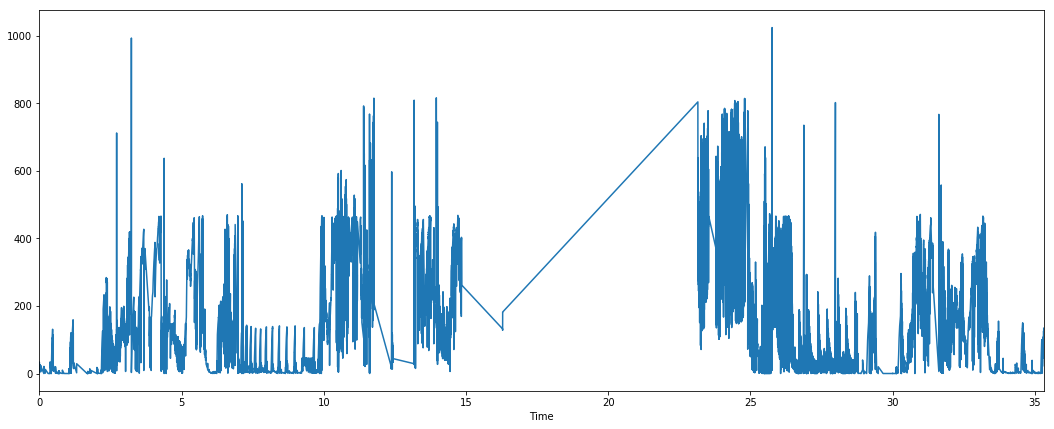

In [18]:
trace.eas.data_frame["cpu_util"].plot(figsize=(18, 7))

# Advanced usage

`register_dynamic_ftrace()` is useful for simple traces in which you don't need to do any post-processing.  If you need to register a full-featured trace class you can use `trappy.register_ftrace_parser()` for this.  For example, a class that parses trace for `capacity_per_group:` and wants to limit the cpumasks to 8-digit could declare it like this:

In [8]:
from trappy.base import Base
class GroupCapacity(Base):

    unique_word = "capacity_per_group:"
    name = "group_capacity"
    _cpus_column = "cpus"

    def __init__(self):
        super(GroupCapacity, self).__init__(
            unique_word=self.unique_word,
        )

    def finalize_object(self):
        if self._cpus_column in self.data_frame.columns:
            self.data_frame[self._cpus_column] = self.data_frame[self._cpus_column].apply('{:0>8}'.format)

trappy.register_ftrace_parser(GroupCapacity)

Now after parsing your trace using `trappy.FTrace()` you can access it's group_capacity member.  For example:

    trappy.LinePlot(trace, GroupCapacity, column="group_capacity", pivot="cpus", marker='.', linestyle='none', per_line=2).view()